<a href="https://colab.research.google.com/github/khalidme94/ML/blob/CH_15/Assaignment_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>

### Data
- [Dog & Horse](https://github.com/gumdropsteve/datasets/blob/master/dog_or_horse.csv)
- [Seattle Rain](https://github.com/gumdropsteve/datasets/blob/master/seattle_weather_1948-2017.csv)


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

#### Dog Horse KMeans Challenge

In [2]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

,height,weight,target,type
15,34.0,55.0,0.0,dog
81,38.0,107.0,0.0,dog
26,27.0,99.0,0.0,dog


Figure out clustering befor start using KMeans:

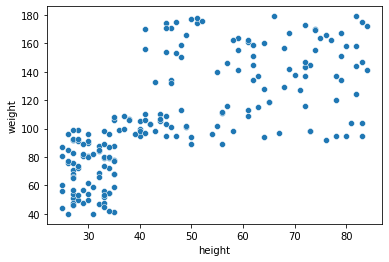

In [3]:
sns.scatterplot(data=df_dh, x='height', y='weight');

In [4]:
# Scale Data
sc=StandardScaler()

In [5]:
X = df_dh[['height', 'weight']]
y = df_dh.target

In [6]:
X_tf = sc.fit_transform(X)

In [7]:
X_tf1= pd.DataFrame(X_tf)
X_tf1

,0,1
0,-1.114906,-0.929680
1,-1.114906,-0.384794
2,-0.842712,-1.552408
3,-0.951590,-0.436688
4,-1.060468,-0.410741
...,...,...
195,0.409380,0.860661
196,1.879227,1.872594
197,-0.080569,0.653086
198,0.463818,-0.462635


In [8]:
X_tf1[0]

0     -1.114906
1     -1.114906
2     -0.842712
3     -0.951590
4     -1.060468
         ...   
195    0.409380
196    1.879227
197   -0.080569
198    0.463818
199    0.572696
Name: 0, Length: 200, dtype: float64

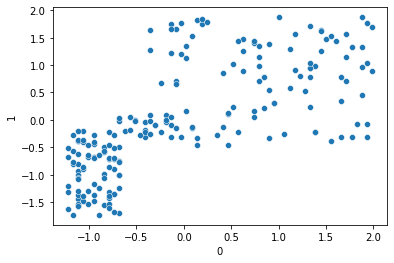

In [9]:
sns.scatterplot(data=X_tf1, x= X_tf1[0], y= X_tf1[1]);

In [10]:
# Apply KMeans and Plot KMeans Results and Actual Results
Km = KMeans(n_clusters=2)

In [11]:
Km.fit(X_tf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
Km.cluster_centers_

array([[ 0.96628215,  0.91732732],
       [-0.74395174, -0.70626086]])

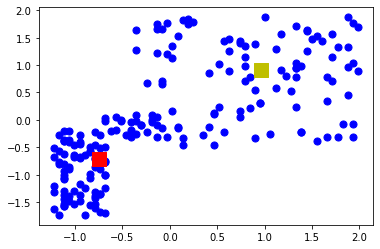

In [13]:
plt.scatter(X_tf1[0], X_tf1[1], s =50, c='b')
plt.scatter(0.96628215,  0.91732732, s=200, c='y', marker='s')
plt.scatter(-0.74395174, -0.70626086, s=200, c='r', marker='s')
#plt.scatter(-0.09077667, -0.03883399, s=200, c='y', marker='s')
plt.show();

In [14]:
preds = Km.labels_

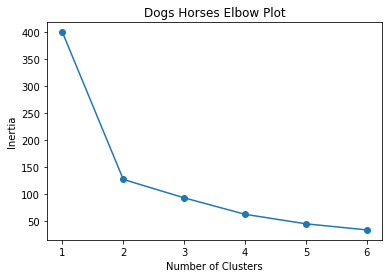

In [15]:
# Create Elbow Plot
import matplotlib.pyplot as plt

inertia_ls = [] # save inertia values
for k in range(1, 7): # test different n_clusters between 1-6
    km = KMeans(n_clusters=k)
    km.fit(X_tf) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 7)], inertia_ls, marker="o")
plt.title("Dogs Horses Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");


In [16]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(y, preds)


0.065

#### Seattle Weather KMeans Challenge

In [17]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
df_sea.sample(3)

,ds,prcp,tmax,tmin,rain
13597,1985-03-24,0.13,46,35,True
13086,1983-10-30,0.30,60,51,True
12292,1981-08-27,0.00,73,51,False


In [18]:
df_sea.isna().sum()

ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [19]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      25551 non-null  object 
 1   prcp    25548 non-null  float64
 2   tmax    25551 non-null  int64  
 3   tmin    25551 non-null  int64  
 4   rain    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [20]:
df_sea['DateTime'] = pd.to_datetime(df_sea['ds'])


In [21]:
#split year into new column
df_sea['year'] = df_sea['DateTime'].dt.year
#split month into new column
df_sea['month'] = df_sea['DateTime'].dt.month
#split day into new column
df_sea['day'] = df_sea['DateTime'].dt.day

In [22]:
df_sea=df_sea.dropna()


In [23]:
df_sea

,ds,prcp,tmax,tmin,rain,DateTime,year,month,day
0,1948-01-01,0.47,51,42,True,1948-01-01,1948,1,1
1,1948-01-02,0.59,45,36,True,1948-01-02,1948,1,2
2,1948-01-03,0.42,45,35,True,1948-01-03,1948,1,3
3,1948-01-04,0.31,45,34,True,1948-01-04,1948,1,4
4,1948-01-05,0.17,45,32,True,1948-01-05,1948,1,5
...,...,...,...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,2017-12-10,2017,12,10
25547,2017-12-11,0.00,49,29,False,2017-12-11,2017,12,11
25548,2017-12-12,0.00,46,32,False,2017-12-12,2017,12,12
25549,2017-12-13,0.00,48,34,False,2017-12-13,2017,12,13


In [24]:
df_sea.drop(['ds', 'DateTime'], axis=1, inplace=True)


In [25]:
df_sea

,prcp,tmax,tmin,rain,year,month,day
0,0.47,51,42,True,1948,1,1
1,0.59,45,36,True,1948,1,2
2,0.42,45,35,True,1948,1,3
3,0.31,45,34,True,1948,1,4
4,0.17,45,32,True,1948,1,5
...,...,...,...,...,...,...,...
25546,0.00,49,34,False,2017,12,10
25547,0.00,49,29,False,2017,12,11
25548,0.00,46,32,False,2017,12,12
25549,0.00,48,34,False,2017,12,13


In [26]:
df_sea['rain'] = df_sea['rain'].map({True:1, False:0})

In [27]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    25548 non-null  float64
 1   tmax    25548 non-null  int64  
 2   tmin    25548 non-null  int64  
 3   rain    25548 non-null  int64  
 4   year    25548 non-null  int64  
 5   month   25548 non-null  int64  
 6   day     25548 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [28]:
df_sea['year']=df_sea['year'].astype(str)
df_sea['month']=df_sea['month'].astype(str)
df_sea['day']=df_sea['day'].astype(str)

In [29]:
df_sea

,prcp,tmax,tmin,rain,year,month,day
0,0.47,51,42,1,1948,1,1
1,0.59,45,36,1,1948,1,2
2,0.42,45,35,1,1948,1,3
3,0.31,45,34,1,1948,1,4
4,0.17,45,32,1,1948,1,5
...,...,...,...,...,...,...,...
25546,0.00,49,34,0,2017,12,10
25547,0.00,49,29,0,2017,12,11
25548,0.00,46,32,0,2017,12,12
25549,0.00,48,34,0,2017,12,13


In [30]:
df_sea=pd.get_dummies(data=df_sea)

In [31]:
df_sea

,prcp,tmax,tmin,rain,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,...,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_1,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_2,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_3,day_30,day_31,day_4,day_5,day_6,day_7,day_8,day_9
0,0.47,51,42,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.59,45,36,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.42,45,35,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.31,45,34,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.17,45,32,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25546,0.00,49,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25547,0.00,49,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25548,0.00,46,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25549,0.00,48,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
X = df_sea.drop('rain',axis=1)
y = df_sea.rain

In [33]:
# Scale Data
ss = StandardScaler()
df_sea = ss.fit_transform(X)


In [34]:
df_sea1=pd.DataFrame(df_sea)

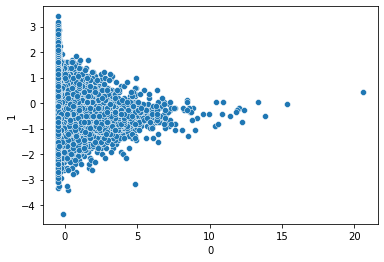

In [35]:
sns.scatterplot(data=df_sea1, x= df_sea1[0], y= df_sea1[1]);

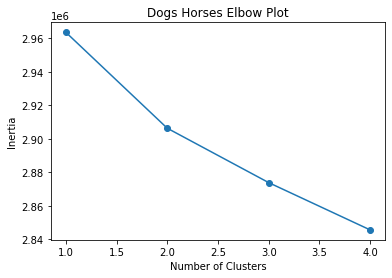

In [36]:
# Create Elbow Plot

inertia_ls = [] # save inertia values
for k in range(1, 5): # test different n_clusters between 1-4
    km = KMeans(n_clusters=k)
    km.fit(df_sea) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 5)], inertia_ls, marker="o")
plt.title("Dogs Horses Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

In [37]:
# Apply KMeans and Plot KMeans Results and Actual Results

Km = KMeans(n_clusters=2)
Km.fit(df_sea)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
Km.cluster_centers_

array([[-2.29424962e-01,  7.68930326e-01,  7.57297886e-01,
        -3.58643621e-03, -3.92318399e-03, -5.90842461e-03,
        -5.24667774e-03,  3.78695879e-04, -6.14449636e-04,
        -5.24667774e-03, -4.58493087e-03, -6.22985761e-03,
         4.72972361e-05,  4.72972361e-05,  7.09044108e-04,
        -2.82159470e-04, -3.92318399e-03, -4.58493087e-03,
        -2.59969025e-03,  3.78695879e-04,  2.03253785e-03,
        -1.27619651e-03,  4.72972361e-05,  1.70040658e-03,
        -1.27619651e-03, -3.92318399e-03, -3.26143712e-03,
        -4.24729156e-03,  4.72972361e-05,  2.03253785e-03,
        -5.24667774e-03,  3.02211727e-03,  6.66476595e-03,
         1.37079098e-03,  4.01777847e-03,  3.02211727e-03,
         1.37079098e-03,  7.09044108e-04,  1.37079098e-03,
        -6.89071296e-03, -1.93794338e-03,  7.09044108e-04,
         6.66476595e-03,  3.78695879e-04,  2.03253785e-03,
         7.09044108e-04, -4.58493087e-03,  4.34382797e-03,
         2.03253785e-03,  3.35603160e-03,  2.03253785e-0

In [39]:
preds = Km.labels_


In [40]:
pd.DataFrame(preds).value_counts()

1    12815
0    12733
dtype: int64

In [41]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(y, preds)


0.6457256928135274

#### Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

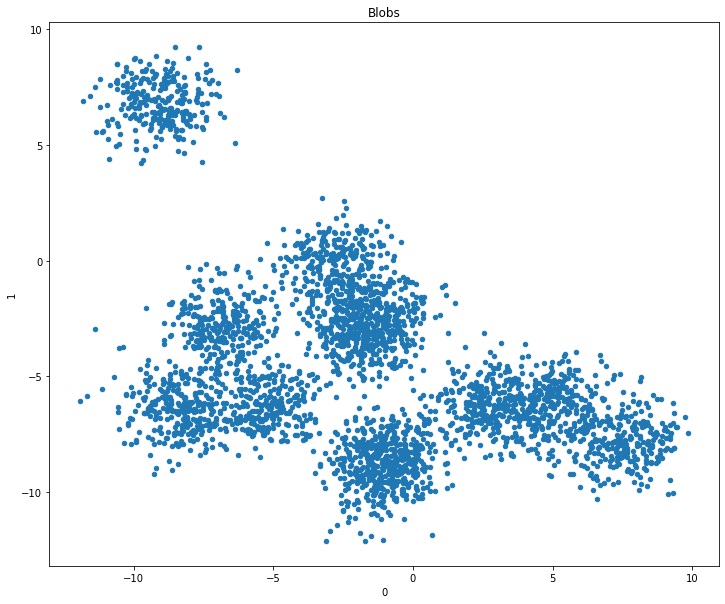

In [42]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [43]:
df_blob

,0,1
0,-9.415274,-6.270802
1,-2.281814,-11.080550
2,4.686391,-4.405890
3,-10.896998,5.842989
4,-3.037765,-2.944027
...,...,...
3220,-0.098342,-4.541191
3221,6.827498,-9.617105
3222,-3.512093,0.314893
3223,6.346015,-7.909602


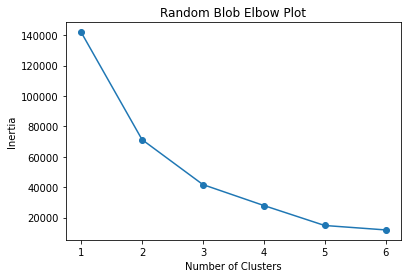

In [44]:
# Create Elbow Plot

inertia_ls = [] # save inertia values
for k in range(1, 7): # test different n_clusters between 1-6
    km = KMeans(n_clusters=k)
    km.fit(df_blob) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 7)], inertia_ls, marker="o")
plt.title("Random Blob Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

In [45]:
# Scale Data

X = df_blob



# Scale Data
ss = StandardScaler()
df_blob = ss.fit_transform(X)


In [46]:
# Apply KMeans and Plot KMeans Results

Km = KMeans(n_clusters=5)
Km.fit(df_blob)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
Km.cluster_centers_

array([[-1.01813695, -0.21365755],
       [-0.05079624,  0.56324563],
       [-1.4321104 ,  2.56216884],
       [ 0.1879561 , -0.96373587],
       [ 1.42343134, -0.55764453]])

In [48]:
centers=pd.DataFrame(Km.cluster_centers_,columns=['0','1'])
centers

,0,1
0,-1.018137,-0.213658
1,-0.050796,0.563246
2,-1.432110,2.562169
3,0.187956,-0.963736
4,1.423431,-0.557645


In [49]:
df_blob1= pd.DataFrame(df_blob)
df_blob1

,0,1
0,-1.500802,-0.445535
1,-0.076846,-1.551800
2,1.314122,-0.016596
3,-1.796578,2.340694
4,-0.227746,0.319639
...,...,...
3220,0.359011,-0.047716
3221,1.741522,-1.215200
3222,-0.322430,1.069206
3223,1.645410,-0.822467


In [50]:
preds = Km.labels_


In [51]:
pd.DataFrame(preds).value_counts()

1    838
4    765
0    759
3    594
2    269
dtype: int64

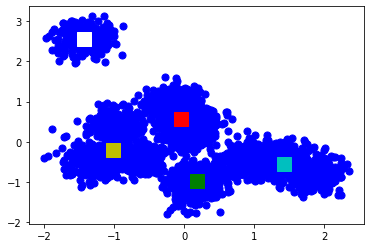

In [52]:
color=['y','r','w','g','c']
plt.scatter(df_blob1[0], df_blob1[1], s =50, c='b')
for i in centers.index:
  l=centers[centers.index==(i)]
  cl=color[i]
  plt.scatter(l.iloc[:,0],l.iloc[:,1], s=200, c=cl, marker='s')


**Comment**

It is illustrated from the chart there are more than two clusters, we tried to make more clusters and we found this result.
